In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive/My Drive/content/hotstar_predicting

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive/content/hotstar_predicting': No such file or directory


In [0]:
!ls gdrive/"My Drive/hotstar_predicting"

test_data.json	train_data.json


In [0]:
train.head(10)

,ID,genres,titles,cities,segment,dow,tod,g1,g2,g3
0,train-1,"Cricket:82379,Kabaddi:255,Reality:4751","Top Raids: Haryana vs Services SCB:103,Day 4: ...","gurgaon:55494,delhi:31892",0,"1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","10:26,13:331,12:323,20:21864,21:16233,17:7953,...","[Cricket, Kabaddi, Reality]","[1, 3, 2, 5, 4, 7, 6]","[10, 13, 12, 20, 21, 17, 16, 19, 18, 22, 2, 14..."
1,train-10,"Cricket:15640,Wildlife:730","Dhoni Quits Captaincy:148,Day 4: India Move in...","delhi:5862,nagar:8916,mumbai:1593",0,"1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","11:1661,10:384,20:401,21:798,22:221,16:525,19:...","[Cricket, Wildlife]","[1, 3, 2, 5, 4, 7, 6]","[11, 10, 20, 21, 22, 16, 19, 18, 23, 1, 3, 2, ..."
2,train-100,"LiveTV:13,Football:4129","Star Sports 4:13,Manchester United vs Everton:...",navi mumbai:4142,0,3:4142,"1:1207,0:2406,2:529","[LiveTV, Football]",[3],"[1, 0, 2]"
3,train-1000,"TalkShow:658,Cricket:7690","SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","new delhi:4131,chennai:2878,navi mumbai:1339",0,"1:658,3:5867,5:413,4:1339,7:71","11:71,20:2417,21:1042,23:2288,19:1872,8:658","[TalkShow, Cricket]","[1, 3, 5, 4, 7]","[11, 20, 21, 23, 19, 8]"
4,train-10000,"Drama:5503,Cricket:3283,Reality:1345","MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","gurgaon:6077,chennai:4055",0,"1:1641,2:480,4:1445,7:1663,6:4900","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23...","[Drama, Cricket, Reality]","[1, 2, 4, 7, 6]","[20, 22, 17, 23, 19, 18, 0, 15, 21]"
5,train-100000,"Action:998,Drama:8795,Cricket:45541","India vs Australia 2nd Test English:2836,SRH v...","hyderabad:998,bangalore:2748,gulbarga:43317,be...",0,"1:6707,3:1948,2:3574,5:8525,4:18938,7:8295,6:7344","11:3450,10:1243,13:4420,12:4210,20:7050,21:770...","[Action, Drama, Cricket]","[1, 3, 2, 5, 4, 7, 6]","[11, 10, 13, 12, 20, 21, 22, 23, 19, 18, 16, 1..."
6,train-100001,"Action:963,TalkShow:18,Romance:1357,Mythology:...","Jodi:7222,Maapillai:1357,Mahabharatham:594,Ban...",navi mumbai:10155,0,"1:1575,3:5330,2:1242,4:2007","11:20,12:574,21:1357,22:1066,23:2290,0:4847","[Action, TalkShow, Romance, Mythology, Reality]","[1, 3, 2, 4]","[11, 12, 21, 22, 23, 0]"
7,train-100002,"Drama:4344,Cricket:9956","Chandra Nandni:4344,India vs England 2nd T20I ...","delhi:1571,navi mumbai:12729",0,"1:333,2:2233,5:739,4:268,7:10727","11:242,15:419,14:1877,22:309,19:3063,18:64,1:2...","[Drama, Cricket]","[1, 2, 5, 4, 7]","[11, 15, 14, 22, 19, 18, 1, 0, 20, 21]"
8,train-100003,"Cricket:1248,Comedy:70","India vs Bangladesh Day 2 English:1066,Fielder...",delhi:1318,0,"2:34,5:1074,7:210","10:844,20:65,17:69,23:78,19:40,9:222","[Cricket, Comedy]","[2, 5, 7]","[10, 20, 17, 23, 19, 9]"
9,train-100004,"Action:86,Drama:4826,Cricket:10557,Kids:24,Tal...","The Jungle Book:24,Jolly LLB:4826,Escape Plan:...","chandigarh:2214,delhi:3829,mumbai:9465",0,"5:14,4:14292,7:1201","11:1,13:1610,12:2626,20:2325,21:2985,17:1252,1...","[Action, Drama, Cricket, Kids, TalkShow]","[5, 4, 7]","[11, 13, 12, 20, 21, 17, 16, 19, 18, 23, 14]"


In [0]:
import json
import pandas as pd
file_name_1 = "gdrive/My Drive/hotstar_predicting/train_data.json"
with open(file_name_1, 'r') as jsonfile1:
    data_dict_1 = json.load(jsonfile1)
    

train = pd.DataFrame.from_dict(data_dict_1, orient='index')
train.reset_index(level=0, inplace=True)
train.rename(columns = {'index':'ID'},inplace=True)
print(train.shape)



(200000, 7)


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
ID         200000 non-null object
genres     200000 non-null object
titles     200000 non-null object
cities     200000 non-null object
segment    200000 non-null object
dow        200000 non-null object
tod        200000 non-null object
dtypes: object(7)
memory usage: 10.7+ MB


In [0]:
s=','
genres = s.join(train['genres'].values.reshape(1,-1).tolist()[0])
genres

Output hidden; open in https://colab.research.google.com to view.

In [0]:
import re
all_genres1=[]
for genre in re.findall('[a-z A-Z0-9:]+',genres):
    all_genres1.append(genre.split(':')[0])
all_genres=list(set(all_genres1))
all_genres1=pd.Series(list((all_genres1))).value_counts()
print("count of genres",all_genres1)
print(all_genres)

count of genres Cricket         114205
Drama            98337
Romance          71407
Reality          58422
TalkShow         50366
Comedy           46808
Family           43543
Action           35998
LiveTV           28353
Thriller         23511
Crime            22829
Mythology        12512
Awards           11611
Football          7466
Horror            6585
Badminton         6570
Sport             6045
Kids              4906
Travel            4148
Wildlife          3875
Teen              2064
Science           1781
Hockey            1534
Kabaddi            936
Documentary        872
Formula1           373
Tennis             274
Athletics          244
Table Tennis       205
FormulaE            33
Volleyball          27
Boxing              26
NA                  12
Swimming             5
IndiaVsSa            1
dtype: int64
['Tennis', 'Drama', 'Kids', 'Family', 'Travel', 'Teen', 'Science', 'Boxing', 'Thriller', 'Formula1', 'Wildlife', 'Comedy', 'Hockey', 'Sport', 'Awards', 'Table Tennis'

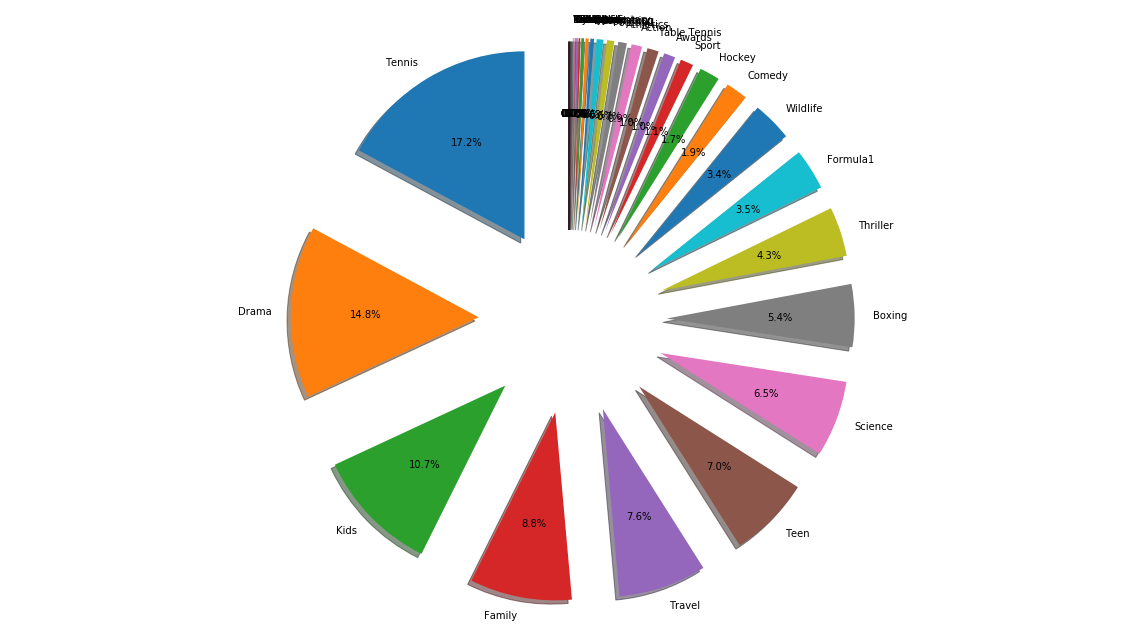

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# Pie chart
labels = all_genres
# only "explode" the 2nd slice (i.e. 'Hogs')
explode=[0.5]*35

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(all_genres1,labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [0]:
from sklearn.preprocessing import LabelEncoder
y_data = train.segment
y_data.head()
#lets encode these target values 
lr = LabelEncoder()
y_data=lr.fit_transform(y_data)
y_data[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0])

In [0]:
train['segment']=train.segment.eq('pos').mul(1)
train.head(10)

,ID,genres,titles,cities,segment,dow,tod
0,train-1,"Cricket:82379,Kabaddi:255,Reality:4751","Top Raids: Haryana vs Services SCB:103,Day 4: ...","gurgaon:55494,delhi:31892",0,"1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","10:26,13:331,12:323,20:21864,21:16233,17:7953,..."
1,train-10,"Cricket:15640,Wildlife:730","Dhoni Quits Captaincy:148,Day 4: India Move in...","delhi:5862,nagar:8916,mumbai:1593",0,"1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","11:1661,10:384,20:401,21:798,22:221,16:525,19:..."
2,train-100,"LiveTV:13,Football:4129","Star Sports 4:13,Manchester United vs Everton:...",navi mumbai:4142,0,3:4142,"1:1207,0:2406,2:529"
3,train-1000,"TalkShow:658,Cricket:7690","SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","new delhi:4131,chennai:2878,navi mumbai:1339",0,"1:658,3:5867,5:413,4:1339,7:71","11:71,20:2417,21:1042,23:2288,19:1872,8:658"
4,train-10000,"Drama:5503,Cricket:3283,Reality:1345","MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","gurgaon:6077,chennai:4055",0,"1:1641,2:480,4:1445,7:1663,6:4900","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23..."
5,train-100000,"Action:998,Drama:8795,Cricket:45541","India vs Australia 2nd Test English:2836,SRH v...","hyderabad:998,bangalore:2748,gulbarga:43317,be...",0,"1:6707,3:1948,2:3574,5:8525,4:18938,7:8295,6:7344","11:3450,10:1243,13:4420,12:4210,20:7050,21:770..."
6,train-100001,"Action:963,TalkShow:18,Romance:1357,Mythology:...","Jodi:7222,Maapillai:1357,Mahabharatham:594,Ban...",navi mumbai:10155,0,"1:1575,3:5330,2:1242,4:2007","11:20,12:574,21:1357,22:1066,23:2290,0:4847"
7,train-100002,"Drama:4344,Cricket:9956","Chandra Nandni:4344,India vs England 2nd T20I ...","delhi:1571,navi mumbai:12729",0,"1:333,2:2233,5:739,4:268,7:10727","11:242,15:419,14:1877,22:309,19:3063,18:64,1:2..."
8,train-100003,"Cricket:1248,Comedy:70","India vs Bangladesh Day 2 English:1066,Fielder...",delhi:1318,0,"2:34,5:1074,7:210","10:844,20:65,17:69,23:78,19:40,9:222"
9,train-100004,"Action:86,Drama:4826,Cricket:10557,Kids:24,Tal...","The Jungle Book:24,Jolly LLB:4826,Escape Plan:...","chandigarh:2214,delhi:3829,mumbai:9465",0,"5:14,4:14292,7:1201","11:1,13:1610,12:2626,20:2325,21:2985,17:1252,1..."


In [0]:
train_data = pd.DataFrame()
#compute watch count
def wcount(p): 
    return p.count(',')+1
  
#calculating count for columns

train_data['title_count'] = train['titles'].map(wcount)
train_data['genres_count'] = train['genres'].map(wcount)
train_data['cities_count'] = train['cities'].map(wcount)
train_data['tod_count'] = train['tod'].map(wcount)
train_data['dow_count'] = train['dow'].map(wcount)



train_data.head(5)

,title_count,genres_count,cities_count,tod_count,dow_count
0,60,3,2,14,7
1,70,2,3,16,7
2,2,2,1,3,1
3,8,2,3,6,5
4,11,3,2,9,5


In [0]:
train['g1'] = [re.sub(pattern='\:\d+',repl='',string=x) for x in train['genres']]
train['g1']

0                                   Cricket,Kabaddi,Reality
1                                          Cricket,Wildlife
2                                           LiveTV,Football
3                                          TalkShow,Cricket
4                                     Drama,Cricket,Reality
5                                      Action,Drama,Cricket
6                 Action,TalkShow,Romance,Mythology,Reality
7                                             Drama,Cricket
8                                            Cricket,Comedy
9                        Action,Drama,Cricket,Kids,TalkShow
10                                                    Drama
11                                          Mythology,Crime
12                      Drama,Romance,TalkShow,Family,Crime
13                                           Romance,Family
14                                                   LiveTV
15                             Romance,Cricket,Sport,LiveTV
16                                      

In [0]:
train['g1'] = train['g1'].apply(lambda x: x.split(','))
train['g1'].head(5)


0    [Cricket, Kabaddi, Reality]
1            [Cricket, Wildlife]
2             [LiveTV, Football]
3            [TalkShow, Cricket]
4      [Drama, Cricket, Reality]
Name: g1, dtype: object

In [0]:
t1 = pd.Series(train['g1']).apply(frozenset).to_frame(name='t_genre')
t1.head(5)

,t_genre
0,"(Reality, Kabaddi, Cricket)"
1,"(Wildlife, Cricket)"
2,"(LiveTV, Football)"
3,"(TalkShow, Cricket)"
4,"(Reality, Drama, Cricket)"


In [0]:
for t_genre in frozenset.union(*t1.t_genre):
    t1[t_genre] = t1.apply(lambda _: int(t_genre in _.t_genre), axis=1)
t1.head(5)

,t_genre,Tennis,Drama,Kids,Family,Travel,Teen,Science,Boxing,Thriller,...,FormulaE,Cricket,TalkShow,Mythology,LiveTV,IndiaVsSa,Reality,Kabaddi,NA,Volleyball
0,"(Reality, Kabaddi, Cricket)",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,"(Wildlife, Cricket)",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,"(LiveTV, Football)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"(TalkShow, Cricket)",0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,"(Reality, Drama, Cricket)",0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [0]:
t1.columns

Index(['t_genre', 'Tennis', 'Drama', 'Kids', 'Family', 'Travel', 'Teen',
       'Science', 'Boxing', 'Thriller', 'Formula1', 'Wildlife', 'Comedy',
       'Hockey', 'Sport', 'Awards', 'Table Tennis', 'Action', 'Athletics',
       'Football', 'Swimming', 'Badminton', 'Horror', 'Documentary', 'Romance',
       'Crime', 'FormulaE', 'Cricket', 'TalkShow', 'Mythology', 'LiveTV',
       'IndiaVsSa', 'Reality', 'Kabaddi', 'NA', 'Volleyball'],
      dtype='object')

In [0]:
t1["Sports"] = t1.Boxing + t1.Hockey + t1.FormulaE + t1.Cricket + t1.Football + t1.Tennis + t1.Kabaddi + t1.IndiaVsSa + t1["Table Tennis"] + t1.Volleyball + t1.Athletics + t1.Swimming + t1.Formula1 + t1.Badminton + t1.Sport

t1.head(5)

,t_genre,Tennis,Drama,Kids,Family,Travel,Teen,Science,Boxing,Thriller,...,Cricket,TalkShow,Mythology,LiveTV,IndiaVsSa,Reality,Kabaddi,NA,Volleyball,Sports
0,"(Reality, Kabaddi, Cricket)",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,2
1,"(Wildlife, Cricket)",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,"(LiveTV, Football)",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,"(TalkShow, Cricket)",0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,"(Reality, Drama, Cricket)",0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [0]:
train_data = pd.merge(train_data, t1, left_index=True,right_index=True)

train_data.drop('t_genre',inplace=True,axis=1)
train_data.drop('NA',inplace=True,axis=1)


train_data.head(5)

,title_count,genres_count,cities_count,tod_count,dow_count,Tennis,Drama,Kids,Family,Travel,...,FormulaE,Cricket,TalkShow,Mythology,LiveTV,IndiaVsSa,Reality,Kabaddi,Volleyball,Sports
0,60,3,2,14,7,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,2
1,70,2,3,16,7,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,2,1,3,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,8,2,3,6,5,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,11,3,2,9,5,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [0]:
train['g2'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in train['dow']]
train['g2'] = train['g2'].apply(lambda x: x.split(','))

train['g2'].head()

0    [1, 3, 2, 5, 4, 7, 6]
1    [1, 3, 2, 5, 4, 7, 6]
2                      [3]
3          [1, 3, 5, 4, 7]
4          [1, 2, 4, 7, 6]
Name: g2, dtype: object

In [0]:
t2 = pd.Series(train['g2']).apply(frozenset).to_frame(name='t_dow')

t2.head()

,t_dow
0,"(2, 6, 7, 1, 4, 3, 5)"
1,"(2, 6, 7, 1, 4, 3, 5)"
2,(3)
3,"(7, 1, 4, 3, 5)"
4,"(2, 6, 7, 1, 4)"


In [0]:
for t_dow in frozenset.union(*t2.t_dow):
    t2[t_dow] = t2.apply(lambda _: int(t_dow in _.t_dow), axis = 1)

t2.columns = ['t_dow','dow_1','dow_2','dow_4','dow_7','dow_3','dow_5','dow_6']

In [0]:
train_data = pd.merge(train_data, t2, left_index=True,right_index=True)

#train_data.head()

train_data.drop('t_dow',inplace=True,axis=1)

train_data.head()

,title_count,genres_count,cities_count,tod_count,dow_count,Tennis,Drama,Kids,Family,Travel,...,Kabaddi,Volleyball,Sports,dow_1,dow_2,dow_4,dow_7,dow_3,dow_5,dow_6
0,60,3,2,14,7,0,0,0,0,0,...,1,0,2,1,1,1,1,1,1,1
1,70,2,3,16,7,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2,2,2,1,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,8,2,3,6,5,0,0,0,0,0,...,0,0,1,0,0,1,1,1,1,1
4,11,3,2,9,5,0,1,0,0,0,...,0,0,1,1,1,1,1,1,0,0


In [0]:
train['g3'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in train['tod']]
train['g3'] = train['g3'].apply(lambda x: x.split(','))

train.g3.head()

0    [10, 13, 12, 20, 21, 17, 16, 19, 18, 22, 2, 14...
1    [11, 10, 20, 21, 22, 16, 19, 18, 23, 1, 3, 2, ...
2                                            [1, 0, 2]
3                              [11, 20, 21, 23, 19, 8]
4                  [20, 22, 17, 23, 19, 18, 0, 15, 21]
Name: g3, dtype: object

In [0]:
t3 = pd.Series(train['g3']).apply(frozenset).to_frame(name='t_tod')

for t_tod in frozenset.union(*t3.t_tod):
    t3[t_tod] = t3.apply(lambda _: int(t_tod in _.t_tod), axis = 1)

t3.head()

,t_tod,8,13,18,17,9,19,14,16,7,...,2,23,10,4,0,6,15,11,1,3
0,"(14, 22, 13, 16, 2, 17, 18, 23, 10, 15, 20, 21...",0,1,1,1,0,1,1,1,0,...,1,1,1,0,0,0,1,0,0,0
1,"(22, 16, 2, 8, 5, 18, 23, 10, 15, 11, 20, 1, 2...",1,0,1,0,1,1,0,1,0,...,1,1,1,0,0,0,1,1,1,1
2,"(1, 0, 2)",0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,"(8, 23, 11, 20, 21, 19)",1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,"(21, 22, 0, 18, 23, 15, 20, 17, 19)",0,0,1,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [0]:
t4 = pd.DataFrame()
t4["first_quarter"] = t3['1'] + t3['2'] + t3['3']+ t3['4']+ t3['5']+ t3['6']
t4["second_quarter"] =t3['7'] + t3['8'] + t3['9']+ t3['10']+ t3['11']+ t3['12']
t4["third_quarter"] = t3['13'] + t3['14'] + t3['15']+ t3['16']+ t3['17']+ t3['18']
t4["fourth_quarter"] = t3['19'] + t3['20'] + t3['21']+ t3['22']+ t3['23']+ t3['0']

train_data = pd.merge(train_data, t4, left_index=True,right_index=True)

train_data.head()

,title_count,genres_count,cities_count,tod_count,dow_count,Tennis,Drama,Kids,Family,Travel,...,dow_2,dow_4,dow_7,dow_3,dow_5,dow_6,first_quarter,second_quarter,third_quarter,fourth_quarter
0,60,3,2,14,7,0,0,0,0,0,...,1,1,1,1,1,1,1,2,6,5
1,70,2,3,16,7,0,0,0,0,0,...,1,1,1,1,1,1,4,4,3,5
2,2,2,1,3,1,0,0,0,0,0,...,0,0,0,0,1,0,2,0,0,1
3,8,2,3,6,5,0,0,0,0,0,...,0,1,1,1,1,1,0,2,0,4
4,11,3,2,9,5,0,1,0,0,0,...,1,1,1,1,0,0,0,0,3,6


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 51 columns):
title_count       200000 non-null int64
genres_count      200000 non-null int64
cities_count      200000 non-null int64
tod_count         200000 non-null int64
dow_count         200000 non-null int64
Tennis            200000 non-null int64
Drama             200000 non-null int64
Kids              200000 non-null int64
Family            200000 non-null int64
Travel            200000 non-null int64
Teen              200000 non-null int64
Science           200000 non-null int64
Boxing            200000 non-null int64
Thriller          200000 non-null int64
Formula1          200000 non-null int64
Wildlife          200000 non-null int64
Comedy            200000 non-null int64
Hockey            200000 non-null int64
Sport             200000 non-null int64
Awards            200000 non-null int64
Table Tennis      200000 non-null int64
Action            200000 non-null int64
Athletics

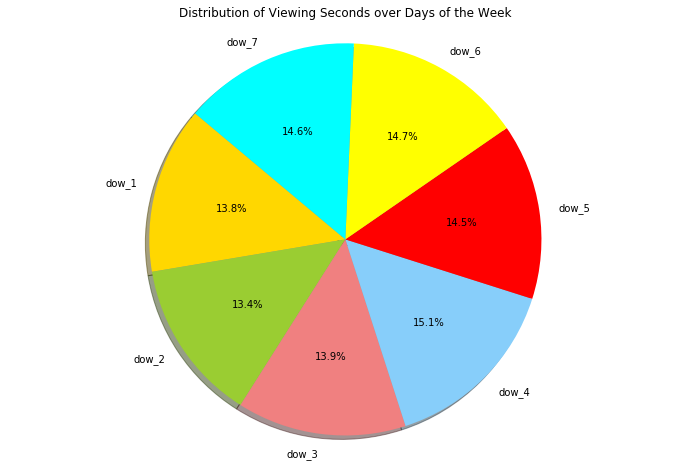

In [116]:
dow_1_sum= train_data['dow_1'].sum()
dow_2_sum= train_data['dow_2'].sum()
dow_3_sum= train_data['dow_3'].sum()
dow_4_sum= train_data['dow_4'].sum()
dow_5_sum= train_data['dow_5'].sum()
dow_6_sum= train_data['dow_6'].sum()
dow_7_sum= train_data['dow_7'].sum()

dow_count_sum=[115826, 112601, 117451, 127420, 122205, 123738, 122773]


colors_dow = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red','yellow', 'cyan']
#explode = (0.1, 0, 0, 0)
plt.figure(figsize=(12,8))
plt.pie(dow_count_sum, labels=['dow_1', 'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7'], colors=colors_dow,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Viewing Seconds over Days of the Week')
plt.show()

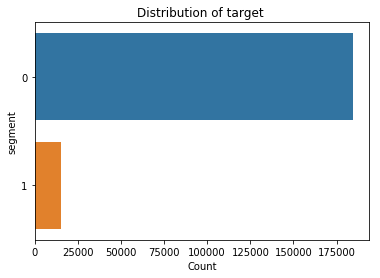

In [117]:
import seaborn as sns
# Plotting distribution of Segments:
sns.countplot(y='segment', data=train)
plt.ylabel('segment')
plt.xlabel('Count')
plt.title('Distribution of target ')
plt.show()

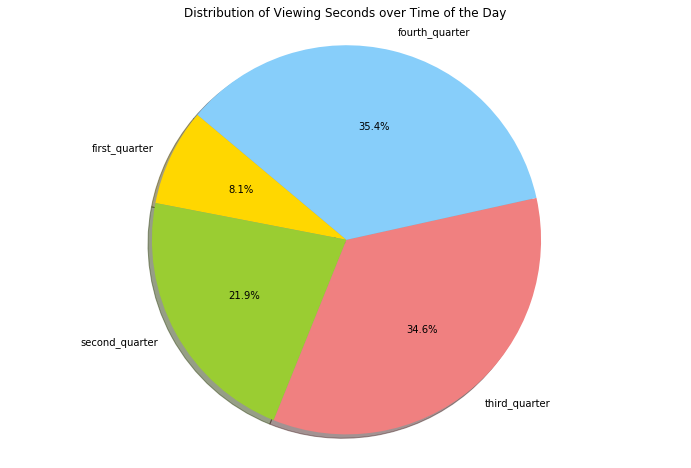

In [118]:
tod_1_sum= train_data['first_quarter'].sum()
tod_2_sum= train_data['second_quarter'].sum()
tod_3_sum= train_data['third_quarter'].sum()
tod_4_sum= train_data['fourth_quarter'].sum()

tod_count_sum = [126947, 344408, 542805, 556467]

colors_tod = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)
plt.figure(figsize=(12,8))
plt.pie(tod_count_sum, labels=['first_quarter','second_quarter','third_quarter','fourth_quarter'], colors=colors_tod,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Viewing Seconds over Time of the Day')
plt.show()

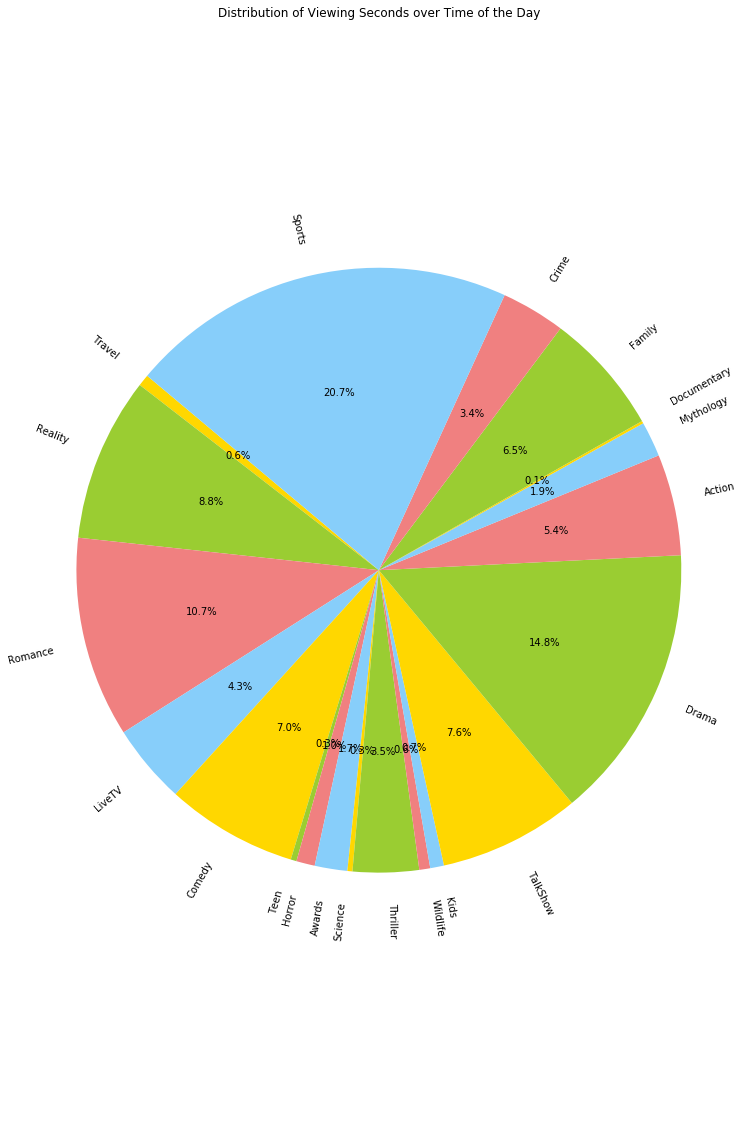

In [119]:
train_data_v1=train_data[["Travel","Reality","Romance","LiveTV","Comedy","Teen","Horror","Awards","Science","Thriller",
              "Wildlife","Kids","TalkShow","Drama","Action","Mythology","Documentary","Family","Crime","Sports",
               "dow_1","dow_2","dow_3","dow_4","dow_5","dow_6","dow_7","title_count","genres_count","cities_count","tod_count",
               "dow_count"]]

genre_displaycol = ["Travel","Reality","Romance","LiveTV","Comedy","Teen","Horror","Awards","Science","Thriller",
              "Wildlife","Kids","TalkShow","Drama","Action","Mythology","Documentary","Family","Crime","Sports"]

genre_count_sum = []
for col in genre_displaycol:
    col_val= train_data_v1[col].sum()
    genre_count_sum.append(col_val)

colors_tod = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)
plt.figure(figsize=(12,20))
plt.pie(genre_count_sum, labels=genre_displaycol, colors=colors_tod,
       autopct='%1.1f%%',  startangle=140, rotatelabels=True)
plt.axis('equal')
plt.title('Distribution of Viewing Seconds over Time of the Day')
plt.show()

In [120]:
train['c'] = [re.sub(pattern='\:\d+',repl='',string=x) for x in train['cities']]
train['c'].head(5)

0                    gurgaon,delhi
1               delhi,nagar,mumbai
2                      navi mumbai
3    new delhi,chennai,navi mumbai
4                  gurgaon,chennai
Name: c, dtype: object

In [121]:
s=','
cities = s.join(train['cities'].values.reshape(1,-1).tolist()[0])
cities

Output hidden; open in https://colab.research.google.com to view.

In [122]:
import re
all_cities1=[]
for cities in re.findall('[a-z A-Z0-9:]+',cities):
    all_cities1.append(cities.split(':')[0])
all_cities=list(set(all_cities1))
all_cities1=pd.Series(list((all_cities1))).value_counts()
print("count of cities",all_cities1)
print(all_cities)

count of cities navi mumbai        72730
delhi              57928
mumbai             57460
bangalore          28669
gurgaon            24730
chennai            21106
Unknown            14628
kolkata            14226
new delhi          12289
pune               11358
bengaluru          10561
hyderabad           9879
chandigarh          5087
ahmedabad           3481
dhaka               3279
prabhadevi          3244
karachi             3058
secunderabad        2293
gandhinagar         1467
nagari              1371
rawalpindi          1368
bhopal              1108
dubayy               944
nagar                870
lahore               801
surat                764
gulshan              607
krishnarajapura      600
srinagar             565
thane                525
                   ...  
tallinn                1
southlake              1
jinjiang               1
kuantan                1
lundby                 1
wroclaw                1
bacau                  1
haifa                  1
montferme

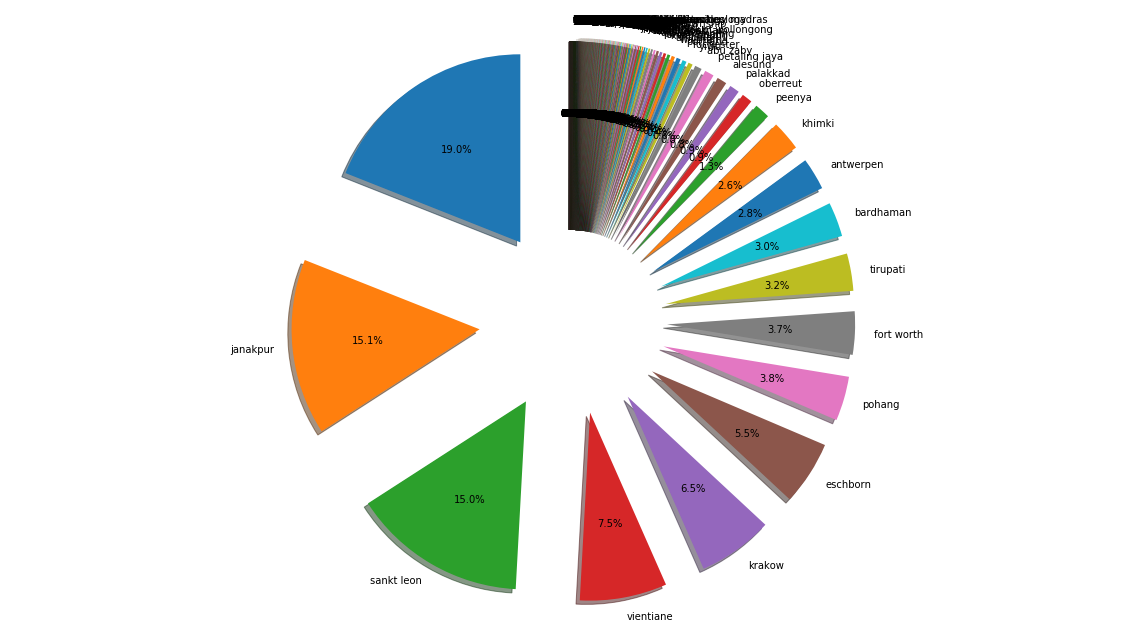

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

# Pie chart
labels = all_cities
# only "explode" the 2nd slice (i.e. 'Hogs')
explode=[0.5]*len(all_cities)

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.pie(all_cities1,labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [126]:
train_data.head(5)

,title_count,genres_count,cities_count,tod_count,dow_count,Tennis,Drama,Kids,Family,Travel,...,dow_2,dow_4,dow_7,dow_3,dow_5,dow_6,first_quarter,second_quarter,third_quarter,fourth_quarter
0,60,3,2,14,7,0,0,0,0,0,...,1,1,1,1,1,1,1,2,6,5
1,70,2,3,16,7,0,0,0,0,0,...,1,1,1,1,1,1,4,4,3,5
2,2,2,1,3,1,0,0,0,0,0,...,0,0,0,0,1,0,2,0,0,1
3,8,2,3,6,5,0,0,0,0,0,...,0,1,1,1,1,1,0,2,0,4
4,11,3,2,9,5,0,1,0,0,0,...,1,1,1,1,0,0,0,0,3,6


In [127]:
train_data.columns

Index(['title_count', 'genres_count', 'cities_count', 'tod_count', 'dow_count',
       'Tennis', 'Drama', 'Kids', 'Family', 'Travel', 'Teen', 'Science',
       'Boxing', 'Thriller', 'Formula1', 'Wildlife', 'Comedy', 'Hockey',
       'Sport', 'Awards', 'Table Tennis', 'Action', 'Athletics', 'Football',
       'Swimming', 'Badminton', 'Horror', 'Documentary', 'Romance', 'Crime',
       'FormulaE', 'Cricket', 'TalkShow', 'Mythology', 'LiveTV', 'IndiaVsSa',
       'Reality', 'Kabaddi', 'Volleyball', 'Sports', 'dow_1', 'dow_2', 'dow_4',
       'dow_7', 'dow_3', 'dow_5', 'dow_6', 'first_quarter', 'second_quarter',
       'third_quarter', 'fourth_quarter'],
      dtype='object')

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from time import time
from IPython.display import display
from sklearn.model_selection import train_test_split
X = train_data.iloc[:,:]
Y = train['segment']

X_train , X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)


In [0]:
from sklearn import metrics
def train_predict(learner, X_train, y_train, X_test, y_test):

    results = {}

    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time

    train_time = end - start

    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time

    pred_time = end - start

    acc_train = accuracy_score(y_train, predictions_train)


    acc_test = accuracy_score(y_test, predictions_test)


    print("{} trained.".format(learner.__class__.__name__))
    #Print model report:
    print("\nModel Report")
    print("--"*10)
    print("Accuracy train: %.4g" % acc_train)
    print("AUC Score (Train): %f" % metrics.roc_auc_score( y_train, predictions_train))
    print("train time:" %acc_train )
    print("--"*10)
    print("Accuracy test: %.4g" % acc_test)
    print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, predictions_test))
    print("test time:"%acc_test)
    print("--"*10)
    print("test statistics:")
    print("--"*10)
    print(metrics.classification_report(y_test, predictions_test))
    print("--"*10)
    print(metrics.confusion_matrix(y_test, predictions_test))
    print("--"*10)
    feat_imp = pd.Series(learner.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    print("--"*10)

    # Return the results
    return results

In [0]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(
learning_rate =0.1,
n_estimators=1000,
max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27)

In [130]:
#y_train1=np.array(y_train).reshape(-1,1)
#y_test1=np.array(y_test).reshape(-1,1)
xgb1.fit(X_train,y_train)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [0]:
# make predictions for test data
#y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def auc_roc(x_test,y_test):
    y_prob=xgb1.predict_proba(x_test)[::,1]
    auc1 = roc_auc_score(y_test, y_prob)
    print("AUC:",auc1)
    fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr1, tpr1, marker='.')
    # show the plot
    plt.show()

AUC: 0.7907359830160061


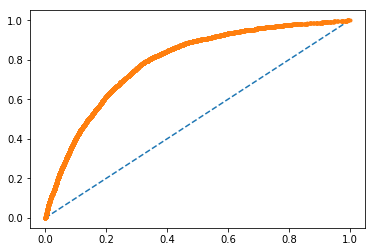

In [134]:
auc_roc(X_test,y_test)

XGBClassifier trained.

Model Report
--------------------
Accuracy train: 0.9288
AUC Score (Train): 0.532083
train time:
--------------------
Accuracy test: 0.921
AUC Score (Test): 0.506555
test time:
--------------------
test statistics:
--------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36863
           1       0.41      0.01      0.03      3137

   micro avg       0.92      0.92      0.92     40000
   macro avg       0.66      0.51      0.49     40000
weighted avg       0.88      0.92      0.89     40000

--------------------
[[36794    69]
 [ 3090    47]]
--------------------
--------------------


{}

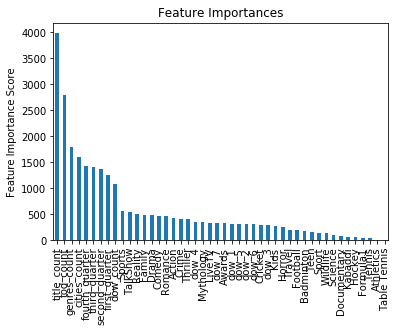

In [141]:
train_predict(xgb1, X_train, y_train, X_test, y_test)

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE


pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: ignored